In [1]:
import os
import sys
import random
import warnings #
import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras import backend as K
import tensorflow as tf
import cv2

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

Using TensorFlow backend.


In [2]:
model4=load_model('detection4.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [13]:
from keras import models
import matplotlib.pyplot as plt

In [10]:
x = np.zeros((1, 128, 128, IMG_CHANNELS), dtype=np.uint8)
img1 = imread('./FLASH/Plants_002_flash.png')[:,:,:IMG_CHANNELS]
img1 = resize(img1, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
x[0] = img1
#img = imread('./AMBIENT/Plants_002_ambient.png')[:,:,:IMG_CHANNELS]
#img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#x[1] = img

2/2 [==============================] - 1s 431ms/step


Text(0.5, 1.0, 'Model4')

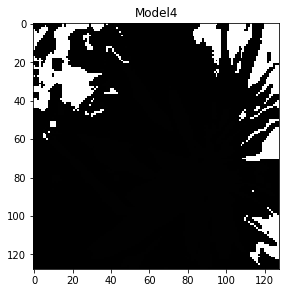

In [4]:
a4 = model4.predict(x[:int(x.shape[0])], verbose=1)
b4 = (a4>0.5).astype(np.uint8)*255


imshow(np.squeeze(b4[0])-np.squeeze(b4[1]))
plt.title("Model4")

In [6]:
cv2.imwrite("./preprocessing.png",img1)

True

In [6]:
len(model4.layers)

42

16


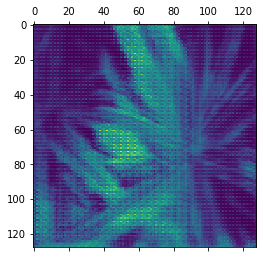

In [43]:
layer_outputs = [layer.output for layer in model4.layers[:41]][1:]
activation_model = models.Model(inputs=model4.input, outputs=layer_outputs)
activations = activation_model.predict(x)
first_layer_activation = activations[39]
print(first_layer_activation.shape[3])
plt.matshow(first_layer_activation[0, :, :, 1])

In [25]:
len(layer_outputs)

41

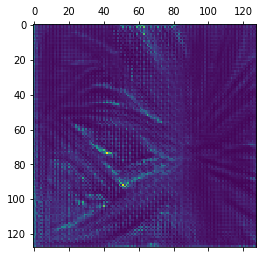

In [44]:
plt.matshow(first_layer_activation[0, :, :, 15])

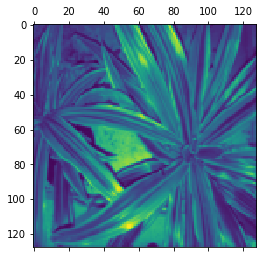

In [37]:
plt.matshow(first_layer_activation[0, :, :, 2])